<br><br><br><br><br>

# Awkward Array

<br><br><br><br><br>

In [10]:
# Awkward Array (or just "awkward") is the library that provides JaggedArrays lazy arrays in uproot.

import uproot
jagged = uproot.open("data/HZZ.root")["events"]["Muon_Px"].array()
print(repr(jagged), end="\n\n")

# Including all the fancy slicing features—everything that Numpy itself can't handle.
print(repr(jagged[:10, 0]))

<JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7fa2f47f6160>

array([-52.899456  ,  -0.81645936,  48.98783   ,  22.088331  ,
        45.17132   ,   9.22811   ,  12.538717  ,  34.88376   ,
       -53.166973  , -67.014854  ], dtype=float32)


**Most users _only_ get awkward through uproot (as a dependency).**

<br>

<img src="img/pip-scientificlinux-uproot.png" width="100%">

In [11]:
# But you can use it on its own.

import awkward

jagged = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5]])
jagged

<JaggedArray [[1.1 2.2 3.3] [] [4.4 5.5]] at 0x7fa2f46b1198>

In [12]:
# The same is true of uproot-methods; anything that is not strictly I/O related is not in uproot.

import uproot_methods

pt  = awkward.fromiter([[ 1.1,  2.2, 3.3], [], [ 4.4,  5.5]])
eta = awkward.fromiter([[-2.2,  0.0, 1.1], [], [ 1.5, -1.5]])
phi = awkward.fromiter([[ 0.2, -0.5, 0.0], [], [-0.1,  0.3]])

jagged = uproot_methods.TLorentzVectorArray.from_ptetaphim(pt, eta, phi, 0.511)
jagged

<JaggedArrayMethods [[TLorentzVector(1.1, -2.2, 0.2, 0.511) TLorentzVector(2.2, 0, -0.5, 0.511) TLorentzVector(3.3, 1.1, 0, 0.511)] [] [TLorentzVector(4.4, 1.5, -0.1, 0.511) TLorentzVector(5.5, -1.5, 0.3, 0.511)]] at 0x7fa2f47f6390>

<br><br><br><br><br>

## Part 1: jaggedness with and without awkward-array

<br><br><br><br><br>

In [13]:
import pandas

# NASA provides this dataset as a CSV file, which suggests a rectangular table: one row per planet.
exoplanets = pandas.read_csv("data/nasa-exoplanets.csv")
exoplanets

,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_disc,st_glon,st_glat,st_radv,st_radverr1,st_radverr2,st_radvlim
0,1,11 Com,b,11 Com b,Radial Velocity,326.030000,0.320000,-0.320000,0.0,1.290000,...,NaN,NaN,NaN,2007,264.140892,78.280522,43.37,0.21,-0.21,0.0
1,2,11 UMi,b,11 UMi b,Radial Velocity,516.219970,3.200000,-3.200000,0.0,1.530000,...,NaN,NaN,0.0,2009,108.718982,41.044516,-17.52,0.15,-0.15,0.0
2,3,14 And,b,14 And b,Radial Velocity,185.840000,0.230000,-0.230000,0.0,0.830000,...,NaN,NaN,NaN,2008,106.411558,-21.050610,-59.73,0.31,-0.31,0.0
3,4,14 Her,b,14 Her b,Radial Velocity,1773.400020,2.500000,-2.500000,0.0,2.930000,...,NaN,NaN,0.0,2002,69.170376,46.944999,NaN,NaN,NaN,NaN
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,798.500000,1.000000,-1.000000,0.0,1.660000,...,NaN,NaN,0.0,1996,83.336460,13.204352,-28.10,0.10,-0.10,0.0
5,6,18 Del,b,18 Del b,Radial Velocity,993.300000,3.200000,-3.200000,0.0,2.600000,...,NaN,NaN,NaN,2008,58.691434,-21.974824,4.35,0.15,-0.15,0.0
6,7,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,NaN,NaN,NaN,NaN,330.000000,...,100.0,-100.0,0.0,2008,352.890560,22.030427,NaN,NaN,NaN,NaN
7,8,24 Boo,b,24 Boo b,Radial Velocity,30.350600,0.007800,-0.007700,0.0,0.190000,...,NaN,NaN,0.0,2018,90.162223,60.643666,-7.77,0.15,-0.15,0.0
8,9,24 Sex,b,24 Sex b,Radial Velocity,452.800000,2.100000,-4.500000,0.0,1.333000,...,NaN,NaN,NaN,2010,245.085309,44.715734,7.29,0.18,-0.18,0.0
9,10,24 Sex,c,24 Sex c,Radial Velocity,883.000000,32.400000,-13.800000,0.0,2.080000,...,NaN,NaN,NaN,2010,245.085309,44.715734,7.29,0.18,-0.18,0.0


In [14]:
# Quite a few planets in this table have the same star ("host") name.

numplanets = exoplanets.groupby("pl_hostname").size()
numplanets[numplanets > 1]

pl_hostname
24 Sex                 2
47 UMa                 3
55 Cnc                 5
61 Vir                 3
BD+20 2457             2
BD-06 1339             2
BD-08 2823             2
CoRoT-20               2
CoRoT-24               2
CoRoT-7                2
EPIC 220674823         2
GJ 1132                2
GJ 1148                2
GJ 163                 3
GJ 273                 2
GJ 3138                3
GJ 317                 2
GJ 3293                4
GJ 3323                2
GJ 3998                2
GJ 581                 3
GJ 667 C               5
GJ 676 A               4
GJ 832                 2
GJ 876                 4
GJ 9827                3
HAT-P-11               2
HAT-P-13               2
HAT-P-17               2
HAT-P-44               2
                      ..
Kepler-94              2
Kepler-953             2
Kepler-967             2
Kepler-968             2
Kepler-969             2
Kepler-97              2
Kepler-990             2
LHS 1140               2
LkCa 15      

In [15]:
# Use Pandas's MultiIndex to represent a sparse, 2D index (stars × planets without missing values).

exoplanets.index = pandas.MultiIndex.from_arrays([exoplanets["pl_hostname"], exoplanets["pl_letter"]])
exoplanets.index.names = ["star", "planet"]
exoplanets

,,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_disc,st_glon,st_glat,st_radv,st_radverr1,st_radverr2,st_radvlim
star,planet,,,,,,,,,,,,,,,,,,,,,
11 Com,b,1,11 Com,b,11 Com b,Radial Velocity,326.030000,0.320000,-0.320000,0.0,1.290000,...,NaN,NaN,NaN,2007,264.140892,78.280522,43.37,0.21,-0.21,0.0
11 UMi,b,2,11 UMi,b,11 UMi b,Radial Velocity,516.219970,3.200000,-3.200000,0.0,1.530000,...,NaN,NaN,0.0,2009,108.718982,41.044516,-17.52,0.15,-0.15,0.0
14 And,b,3,14 And,b,14 And b,Radial Velocity,185.840000,0.230000,-0.230000,0.0,0.830000,...,NaN,NaN,NaN,2008,106.411558,-21.050610,-59.73,0.31,-0.31,0.0
14 Her,b,4,14 Her,b,14 Her b,Radial Velocity,1773.400020,2.500000,-2.500000,0.0,2.930000,...,NaN,NaN,0.0,2002,69.170376,46.944999,NaN,NaN,NaN,NaN
16 Cyg B,b,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,798.500000,1.000000,-1.000000,0.0,1.660000,...,NaN,NaN,0.0,1996,83.336460,13.204352,-28.10,0.10,-0.10,0.0
18 Del,b,6,18 Del,b,18 Del b,Radial Velocity,993.300000,3.200000,-3.200000,0.0,2.600000,...,NaN,NaN,NaN,2008,58.691434,-21.974824,4.35,0.15,-0.15,0.0
1RXS J160929.1-210524,b,7,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,NaN,NaN,NaN,NaN,330.000000,...,100.0,-100.0,0.0,2008,352.890560,22.030427,NaN,NaN,NaN,NaN
24 Boo,b,8,24 Boo,b,24 Boo b,Radial Velocity,30.350600,0.007800,-0.007700,0.0,0.190000,...,NaN,NaN,0.0,2018,90.162223,60.643666,-7.77,0.15,-0.15,0.0
24 Sex,b,9,24 Sex,b,24 Sex b,Radial Velocity,452.800000,2.100000,-4.500000,0.0,1.333000,...,NaN,NaN,NaN,2010,245.085309,44.715734,7.29,0.18,-0.18,0.0


In [16]:
# Simplify the table to show 5 star attributes and 5 planet attributes. Star attributes are repeated.

df = exoplanets[["ra", "dec", "st_dist", "st_mass", "st_rad", "pl_orbsmax", "pl_orbeccen", "pl_orbper", "pl_bmassj", "pl_radj"]]
df.columns = pandas.MultiIndex.from_arrays([["star"] * 5 + ["planet"] * 5,
    ["right asc. (deg)", "declination (deg)", "distance (pc)", "mass (solar)", "radius (solar)", "orbit (AU)", "eccen.", "period (days)", "mass (Jupiter)", "radius (Jupiter)"]])
df

star                    \
                                 right asc. (deg) declination (deg)   
star                      planet                                      
11 Com                    b            185.179276         17.792868   
11 UMi                    b            229.274536         71.823898   
14 And                    b            352.822571         39.236198   
14 Her                    b            242.601303         43.817646   
16 Cyg B                  b            295.466553         50.517525   
18 Del                    b            314.608063         10.839286   
1RXS J160929.1-210524     b            242.376268        -21.083036   
24 Boo                    b            217.157547         49.844852   
24 Sex                    b            155.868210         -0.902244   
                          c            155.868210         -0.902244   
2MASS J01225093-2439505   b             20.712243        -24.664049   
2MASS J02192210-3925225   b             34.842106        -39.422928   
2MASS J04414489+2301513   b             70.437073         23.030941   
2MASS J12073346-3932539   b            181.889447        -39.548332   
2MASS J19383260+4603591   b            294.635865         46.066418   
2MASS J21402931+1625183 A b            325.122159         16.421759   
2MASS J22362452+4751425   b            339.102203         47.861820   
30 Ari B                  b             39.240585         24.648064   
4 UMa                     b            130.053406         64.327934   
42 Dra                    b            276.496399         65.563484   
47 UMa                    b            164.866562         40.430256   
                          c            164.866562         40.430256   
                          d            164.866562         40.430256   
51 Eri                    b             69.400551         -2.473548   
51 Peg                    b            344.366577         20.768833   
55 Cnc                    b            133.149216         28.330818   
                          c            133.149216         28.330818   
                          d            133.149216         28.330818   
                          e            133.149216         28.330818   
                          f            133.149216         28.330818   
...                                           ...               ...   
eps CrB                   b            239.396881         26.877880   
eps Eri                   b             53.232685         -9.458262   
eps Tau                   b             67.154167         19.180431   
gam 1 Leo                 b            154.993149         19.841488   
gam Cep                   b            354.836884         77.632278   
gam Lib                   b            233.881577        -14.789536   
                          c            233.881577        -14.789536   
iot Dra                   b            231.232391         58.966064   
kap And                   b            355.102112         44.333931   
kap CrB                   b            237.808044         35.657383   
mu Leo                    b            148.190903         26.006952   
nu Oph                    b            269.756622         -9.773632   
                          c            269.756622         -9.773632   
ome Ser                   b            237.573105          2.196509   
omi CrB                   b            230.035660         29.616209   
omi UMa                   b            127.566124         60.718170   
HD 39091                  c             84.291214        -80.469124   
psi 1 Dra B               b            265.492096         72.156914   
rho CrB                   b            240.261093         33.303509   
                          c            240.261093         33.303509   
tau Boo                   b            206.815598         17.456905   
tau Cet                   e             26.017012        -15.937480   
                          f             26.017012        -15.937480  

In [17]:
# DataFrame.unstack moves the sparse planet index into a dense set of columns.
# Every column (reduced to 2: orbit and mass) is duplicated 8 times because one star has 8 planets.

df[[("planet", "orbit (AU)"), ("planet", "mass (Jupiter)")]].unstack("planet")

planet                                      \
                           orbit (AU)                                       
planet                              b         c         d        e      f   
star                                                                        
11 Com                       1.290000       NaN       NaN      NaN    NaN   
11 UMi                       1.530000       NaN       NaN      NaN    NaN   
14 And                       0.830000       NaN       NaN      NaN    NaN   
14 Her                       2.930000       NaN       NaN      NaN    NaN   
16 Cyg B                     1.660000       NaN       NaN      NaN    NaN   
18 Del                       2.600000       NaN       NaN      NaN    NaN   
1RXS J160929.1-210524      330.000000       NaN       NaN      NaN    NaN   
24 Boo                       0.190000       NaN       NaN      NaN    NaN   
24 Sex                       1.333000  2.080000       NaN      NaN    NaN   
2MASS J01225093-2439505     52.000000       NaN       NaN      NaN    NaN   
2MASS J02192210-3925225    156.000000       NaN       NaN      NaN    NaN   
2MASS J04414489+2301513     15.000000       NaN       NaN      NaN    NaN   
2MASS J12073346-3932539     46.000000       NaN       NaN      NaN    NaN   
2MASS J19383260+4603591      0.920000       NaN       NaN      NaN    NaN   
2MASS J21402931+1625183 A         NaN       NaN       NaN      NaN    NaN   
2MASS J22362452+4751425    230.000000       NaN       NaN      NaN    NaN   
30 Ari B                     0.990000       NaN       NaN      NaN    NaN   
4 UMa                        0.870000       NaN       NaN      NaN    NaN   
42 Dra                       1.190000       NaN       NaN      NaN    NaN   
47 UMa                       2.100000  3.600000  11.60000      NaN    NaN   
51 Eri                      13.200000       NaN       NaN      NaN    NaN   
51 Peg                       0.052700       NaN       NaN      NaN    NaN   
55 Cnc                       0.115227  0.241376   5.50300  0.01544  0.788   
6 Lyn                        2.110000       NaN       NaN      NaN    NaN   
61 Vir                       0.050201  0.217500   0.47600      NaN    NaN   
7 CMa                        1.930000       NaN       NaN      NaN    NaN   
70 Vir                       0.481000       NaN       NaN      NaN    NaN   
75 Cet                       2.100000       NaN       NaN      NaN    NaN   
8 UMi                        0.490000       NaN       NaN      NaN    NaN   
81 Cet                       2.500000       NaN       NaN      NaN    NaN   
...                               ...       ...       ...      ...    ...   
XO-4                              NaN       NaN       NaN      NaN    NaN   
XO-5                         0.051500       NaN       NaN      NaN    NaN   
XO-6                         0.081500       NaN       NaN      NaN    NaN   
YZ Cet                       0.015570  0.020900   0.02764      NaN    NaN   
alf Ari                      1.200000       NaN       NaN      NaN    NaN   
alf Tau                      1.460000       NaN       NaN      NaN    NaN   
bet Cnc                      1.700000       NaN       NaN      NaN    NaN   
bet Pic                      9.100000       NaN       NaN      NaN    NaN   
bet UMi                      1.400000       NaN       NaN      NaN    NaN   
eps CrB                      1.300000       NaN       NaN      NaN    NaN   
eps Eri                      3.390000       NaN       NaN      NaN    NaN   
eps Tau                      1.930000       NaN       NaN      NaN    NaN   
gam 1 Leo                    1.190000       NaN       NaN      NaN    NaN   
gam Cep                      2.050000       NaN       NaN      NaN    NaN   
gam Lib                      1.240000  2.170000       NaN      NaN    NaN   
iot Dra                      1.275000       NaN       NaN      NaN    NaN   
kap And                     55.000000       NaN       NaN      NaN    NaN   
kap CrB                    

In [18]:
# We can also select a cross-section (xs) of the index by planet letter to focus on one at a time.

df.xs("b", level="planet")   # try "c", "d", "e", "f", "g", "h", "i"

star                                  \
                          right asc. (deg) declination (deg) distance (pc)   
star                                                                         
11 Com                          185.179276         17.792868         93.37   
11 UMi                          229.274536         71.823898        125.72   
14 And                          352.822571         39.236198         75.59   
14 Her                          242.601303         43.817646         17.94   
16 Cyg B                        295.466553         50.517525         21.41   
18 Del                          314.608063         10.839286         76.38   
1RXS J160929.1-210524           242.376268        -21.083036        145.00   
24 Boo                          217.157547         49.844852         96.25   
24 Sex                          155.868210         -0.902244         72.21   
2MASS J01225093-2439505          20.712243        -24.664049         36.00   
2MASS J02192210-3925225          34.842106        -39.422928         39.40   
2MASS J04414489+2301513          70.437073         23.030941        140.00   
2MASS J12073346-3932539         181.889447        -39.548332         52.40   
2MASS J19383260+4603591         294.635865         46.066418        396.36   
2MASS J21402931+1625183 A       325.122159         16.421759         25.00   
2MASS J22362452+4751425         339.102203         47.861820         74.00   
30 Ari B                         39.240585         24.648064         44.71   
4 UMa                           130.053406         64.327934         73.58   
42 Dra                          276.496399         65.563484         90.86   
47 UMa                          164.866562         40.430256         13.80   
51 Eri                           69.400551         -2.473548         29.40   
51 Peg                          344.366577         20.768833         15.47   
55 Cnc                          133.149216         28.330818         12.59   
6 Lyn                            97.696281         58.162632         54.74   
61 Vir                          199.601318        -18.311195          8.51   
7 CMa                            99.170990        -19.255878         19.82   
70 Vir                          202.107544         13.778788         17.91   
75 Cet                           38.039253         -1.034896         83.15   
8 UMi                           224.201477         74.900925        159.10   
81 Cet                           39.424168         -3.396175        101.53   
...                                    ...               ...           ...   
XO-3                             65.469581         57.817181        174.00   
XO-4                            110.388223         58.268108        293.00   
XO-5                            116.716527         39.094578        260.00   
XO-6                             94.793282         73.827682        237.06   
YZ Cet                           18.127668        -16.998966          3.60   
alf Ari                          31.793364         23.462423         20.21   
alf Tau                          68.980164         16.509302         20.43   
bet Cnc                         124.128838          9.185545         90.54   
bet Pic                          86.821198        -51.066513         19.75   
bet UMi                         222.676361         74.155502         38.78   
eps CrB                         239.396881         26.877880         69.98   
eps Eri                          53.232685         -9.458262          3.21   
eps Tau                          67.154167         19.180431         49.23   
gam 1 Leo                       154.993149         19.841488         38.52   
gam Cep                         354.836884         77.632278         13.54   
gam Lib                         233.881577        -14.789536         47.43   
iot Dra                         231.232391         58.966064         31.67   
kap And                         355.102112         44.333931

<br><br><br>

It's not too bad, but there's only one jagged array in this dataset: planets per star.

<br>

In SQL, we'd have to maintain two tables: a stars table and a planets table, and constantly `JOIN ON` star id.

<br>

For HEP data, with jagged electrons, muons, taus, photons, a dozen jet collections, etc., this would get out of hand.

<br><br><br>

<br>

**Object-oriented programming was good for HEP.** We'd like to think of particles as objects, not a table.

<table width="100%"><tr><td width="47%"><img src="img/muons-as-objects.png" width="100%"></td><td width="53%"><img src="img/muons-as-a-table.png" width="100%"></td></tr></table>

<br>

In [20]:
# Convert the jagged DataFrame into nested objects!

stardicts = []
for (starname, planetname), row in df.iterrows():
    if len(stardicts) == 0 or stardicts[-1]["name"] != starname:
        stardicts.append({"name": starname,
                          "ra": row["star", "right asc. (deg)"],
                          "dec": row["star", "declination (deg)"],
                          "dist": row["star", "distance (pc)"],
                          "mass": row["star", "mass (solar)"],
                          "radius": row["star", "radius (solar)"],
                          "planets": []})
    stardicts[-1]["planets"].append({"name": planetname,
                                     "orbit": row["planet", "orbit (AU)"],
                                     "eccen": row["planet", "eccen."],
                                     "period": row["planet", "period (days)"],
                                     "mass": row["planet", "mass (Jupiter)"],
                                     "radius": row["planet", "radius (Jupiter)"]})

In [21]:
stardicts[:30]

[{'name': '11 Com',
  'ra': 185.179276,
  'dec': 17.792868,
  'dist': 93.37,
  'mass': 2.7,
  'radius': 19.0,
  'planets': [{'name': 'b',
    'orbit': 1.29,
    'eccen': 0.231,
    'period': 326.03,
    'mass': 19.4,
    'radius': nan}]},
 {'name': '11 UMi',
  'ra': 229.27453599999998,
  'dec': 71.823898,
  'dist': 125.72,
  'mass': 2.78,
  'radius': 29.79,
  'planets': [{'name': 'b',
    'orbit': 1.53,
    'eccen': 0.08,
    'period': 516.21997,
    'mass': 14.74,
    'radius': nan}]},
 {'name': '14 And',
  'ra': 352.822571,
  'dec': 39.236198,
  'dist': 75.59,
  'mass': 2.2,
  'radius': 11.0,
  'planets': [{'name': 'b',
    'orbit': 0.83,
    'eccen': 0.0,
    'period': 185.84,
    'mass': 4.8,
    'radius': nan}]},
 {'name': '14 Her',
  'ra': 242.60130299999997,
  'dec': 43.817646,
  'dist': 17.94,
  'mass': 0.9,
  'radius': 0.93,
  'planets': [{'name': 'b',
    'orbit': 2.93,
    'eccen': 0.37,
    'period': 1773.40002,
    'mass': 4.66,
    'radius': nan}]},
 {'name': '16 Cyg B',


In [24]:
# awkward-array can represent any collection of nested objects as arrays

stars = awkward.fromiter(stardicts)
stars

<Table [<Row 0> <Row 1> <Row 2> ... <Row 2932> <Row 2933> <Row 2934>] at 0x7fa2d6f54438>

In [25]:
# We can still think of them as objects...

stars[:30].tolist()

[{'dec': 17.792868,
  'dist': 93.37,
  'mass': 2.7,
  'name': '11 Com',
  'planets': [{'eccen': 0.231,
    'mass': 19.4,
    'name': 'b',
    'orbit': 1.29,
    'period': 326.03,
    'radius': nan}],
  'ra': 185.179276,
  'radius': 19.0},
 {'dec': 71.823898,
  'dist': 125.72,
  'mass': 2.78,
  'name': '11 UMi',
  'planets': [{'eccen': 0.08,
    'mass': 14.74,
    'name': 'b',
    'orbit': 1.53,
    'period': 516.21997,
    'radius': nan}],
  'ra': 229.27453599999998,
  'radius': 29.79},
 {'dec': 39.236198,
  'dist': 75.59,
  'mass': 2.2,
  'name': '14 And',
  'planets': [{'eccen': 0.0,
    'mass': 4.8,
    'name': 'b',
    'orbit': 0.83,
    'period': 185.84,
    'radius': nan}],
  'ra': 352.822571,
  'radius': 11.0},
 {'dec': 43.817646,
  'dist': 17.94,
  'mass': 0.9,
  'name': '14 Her',
  'planets': [{'eccen': 0.37,
    'mass': 4.66,
    'name': 'b',
    'orbit': 2.93,
    'period': 1773.40002,
    'radius': nan}],
  'ra': 242.60130299999997,
  'radius': 0.93},
 {'dec': 50.517525,
  

In [26]:
# ... but they're represented in memory as efficient columnar arrays.
for starattr in "name", "ra", "dec", "dist", "mass", "radius":
    print("{:15s} =".format("stars[{!r:}]".format(starattr)), stars[starattr])
print()
for planetattr in "name", "orbit", "eccen", "period", "mass", "radius":
    print("{:26s} =".format("stars['planets'][{!r:}]".format(planetattr)), stars["planets"][planetattr])

stars['name']   = ['11 Com' '11 UMi' '14 And' ... 'tau Gem' 'ups And' 'xi Aql']
stars['ra']     = [185.179276 229.274536 352.822571 ... 107.784882  24.199345 298.562012]
stars['dec']    = [17.792868 71.823898 39.236198 ... 30.245163 41.40546   8.461452]
stars['dist']   = [ 93.37 125.72  75.59 ... 112.64  13.41  56.27]
stars['mass']   = [2.7  2.78 2.2  ... 2.3  1.3  2.2 ]
stars['radius'] = [19.   29.79 11.   ... 26.8   1.56 12.  ]

stars['planets']['name']   = [['b'] ['b'] ['b'] ... ['b'] ['b' 'c' 'd'] ['b']]
stars['planets']['orbit']  = [[1.29] [1.53] [0.83] ... [1.17] [0.059222000000000004 0.827774 2.51329] [0.68]]
stars['planets']['eccen']  = [[0.231] [0.08] [0.0] ... [0.031] [0.0215 0.2596 0.2987] [0.0]]
stars['planets']['period'] = [[326.03] [516.21997] [185.84] ... [305.5] [4.617033 241.258 1276.46] [136.75]]
stars['planets']['mass']   = [[19.4] [14.74] [4.8] ... [20.6] [0.6876 1.981 4.132] [2.8]]
stars['planets']['radius'] = [[nan] [nan] [nan] ... [nan] [nan nan nan] [nan]]


In [29]:
# The object structure is a façade, built on Numpy arrays.

planet_masses = stars["planets"]["mass"]

print("\nplanet_masses =", planet_masses)                 # It appears to be a list of lists;
print("\ntype(planet_masses) =", type(planet_masses))     # but it is a JaggedArray class instance;
print("\nplanet_masses.content =", planet_masses.content) # whose numerical data are in one array;
print("\nplanet_masses.offsets =", planet_masses.offsets) # and divisions between stars in another.


planet_masses = [[19.4] [14.74] [4.8] ... [20.6] [0.6876 1.981 4.132] [2.8]]

type(planet_masses) = <class 'awkward.array.jagged.JaggedArray'>

planet_masses.content = [19.4   14.74   4.8   ...  1.981  4.132  2.8  ]

planet_masses.offsets = [   0    1    2 ... 3929 3932 3933]


In [36]:
# The equivalent of Pandas's unstack is pad (inserting None to get non-jagged subarrays).

stars["planets"][["orbit", "mass"]].pad(5, clip=True)

<JaggedArray [[<Row 0> None None None None] [<Row 1> None None None None] [<Row 2> None None None None] ... [<Row 3928> None None None None] [<Row 3929> <Row 3930> <Row 3931> None None] [<Row 3932> None None None None]] at 0x7fa2d6f7c9b0>

In [38]:
# Which is a step toward getting regular arrays (e.g. for machine learning).

stars["planets"]["mass"].pad(5, clip=True).fillna(-1).regular()

array([[19.4   , -1.    , -1.    , -1.    , -1.    ],
       [14.74  , -1.    , -1.    , -1.    , -1.    ],
       [ 4.8   , -1.    , -1.    , -1.    , -1.    ],
       ...,
       [20.6   , -1.    , -1.    , -1.    , -1.    ],
       [ 0.6876,  1.981 ,  4.132 , -1.    , -1.    ],
       [ 2.8   , -1.    , -1.    , -1.    , -1.    ]])

In [473]:
# Pandas's cross-section is just a slice.
# 
#     : in first dimension means "everything"
#     0 in second dimension means "first"

stars["planets"][:, 0].tolist()

[{'eccen': 0.231,
  'mass': 19.4,
  'name': 'b',
  'orbit': 1.29,
  'period': 326.03,
  'radius': nan},
 {'eccen': 0.08,
  'mass': 14.74,
  'name': 'b',
  'orbit': 1.53,
  'period': 516.21997,
  'radius': nan},
 {'eccen': 0.0,
  'mass': 4.8,
  'name': 'b',
  'orbit': 0.83,
  'period': 185.84,
  'radius': nan},
 {'eccen': 0.37,
  'mass': 4.66,
  'name': 'b',
  'orbit': 2.93,
  'period': 1773.40002,
  'radius': nan},
 {'eccen': 0.68,
  'mass': 1.78,
  'name': 'b',
  'orbit': 1.66,
  'period': 798.5,
  'radius': nan},
 {'eccen': 0.08,
  'mass': 10.3,
  'name': 'b',
  'orbit': 2.6,
  'period': 993.3,
  'radius': nan},
 {'eccen': nan,
  'mass': 8.0,
  'name': 'b',
  'orbit': 330.0,
  'period': nan,
  'radius': nan},
 {'eccen': 0.042,
  'mass': 0.91,
  'name': 'b',
  'orbit': 0.19,
  'period': 30.3506,
  'radius': nan},
 {'eccen': 0.09,
  'mass': 1.99,
  'name': 'b',
  'orbit': 1.333,
  'period': 452.8,
  'radius': nan},
 {'eccen': nan,
  'mass': 24.5,
  'name': 'b',
  'orbit': 52.0,
  'peri

In [41]:
# We can reproduce Pandas MultiIndex abilities for one jagged array, yet work with many jagged arrays.

particle_energy = uproot.open("data/HZZ.root")["events"].arrays(["*_E"], namedecode="utf-8")

for name, array in particle_energy.items():
    print("\nparticle_energies['{}'] = {}".format(name, array))


particle_energies['Jet_E'] = [[] [44.137363] [] ... [55.95058] [229.57799 33.92035] []]

particle_energies['Muon_E'] = [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]]

particle_energies['Electron_E'] = [[] [] [] ... [] [] []]

particle_energies['Photon_E'] = [[] [] [] ... [] [191.94357] [17.745419]]


Jaggedness is one kind of awkwardness: the library handles enough to reproduce object-oriented programming.

| Array type | Purpose | Members | Usage |
|:-----------|:--------|:--------|:------|
| JaggedArray | variable-sized data structures | starts, stops, content | ubiquitous |
| Table | struct-like objects in columns | contents _(dict)_ | ubiquitous |
| ObjectArray | arbitrary Python types on demand | generator, content | common |
| Methods | mix-in methods and properties on any array type | _(none)_ | common |
| MaskedArray | allow nullable values (`None`) | mask _(bytes)_, content | occasional |
| BitMaskedArray | same, but with a bit-mask | mask _(bits)_, content | from Arrow |
| IndexedMaskedArray | same, but with dense content | mask-index _(integers)_ content | rare |
| IndexedArray | lazy integer indexing: "pointers" | index, content | rare |
| SparseArray | huge array defined at a few indexes | index, content, default | rare |
| UnionArray | heterogeneous types or data sources | tags, index, contents _(list)_ | rare |
| StringArray | special case: jagged array of characters | starts, stops, content, string methods | common |
| ChunkedArray | discontiguous array presented as a whole | counts, chunks _(lists)_ | lazy arrays |
| AppendableArray | chunked allocation for efficient appending | counts, chunks _(lists)_ | rare |
| VirtualArray | array generated from a function when needed | generator, possible cached array | lazy arrays |

<br><br><br><br><br>

## Part 2: basic jagged array operations

<br><br><br><br><br>

In [132]:
x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])

# A JaggedArray is made of starts & stops indexes and any kind of content.
print(f"\n\nx         = {x}\nx.starts  = {x.starts}\nx.stops   = {x.stops}\nx.content = {x.content}")

# Modifying the starts & stops changes the meaning of the array.
x.starts = x.starts + 2

print(f"\n\nx         = {x}\nx.starts  = {x.starts}\nx.stops   = {x.stops}\nx.content = {x.content}")



x         = [[1.1 2.2 3.3 4.4] [5.5 6.6] [7.7 8.8 9.9]]
x.starts  = [0 4 6]
x.stops   = [4 6 9]
x.content = [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8 9.9]


x         = [[3.3 4.4] [] [9.9]]
x.starts  = [2 6 8]
x.stops   = [4 6 9]
x.content = [1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8 9.9]


In [138]:
x = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6], [7.7, 8.8, 9.9]])

print(f"\nx.counts  = {x.counts}")     # counts is a flat array of number of items in each subarray

print(f"\nx.offsets = {x.offsets}")    # offsets is its cumulative sum (if there are no gaps)

print(f"\nx.starts  = {x.starts}")     # starts and stops are a generalization of offsets;
print(f"\nx.stops   = {x.stops}")      # allows gaps, like in the previous slide

print(f"\nx.parents = {x.parents}")    # parents is the subarray index for each item in content

print(f"\nx.index   = {x.index}")      # local index counter; useful for making MultiIndex in Pandas


x.counts  = [3 0 2 1 3]

x.offsets = [0 3 3 5 6 9]

x.starts  = [0 3 3 5 6]

x.stops   = [3 3 5 6 9]

x.parents = [0 0 0 2 2 3 4 4 4]

x.index   = [[0 1 2] [] [0 1] [0] [0 1 2]]


In [46]:
# JaggedArrays have slicing operations to behave like Numpy as much as possible...

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4], [5.5, 6.6], [7.7, 8.8, 9.9]])
print(f"\nx                      = {x}")

print(f"\nx[:2]                  = {x[:2]}")                   # take the first two inner lists

print(f"\nx[:, :2]               = {x[:, :2]}")                # take the first two of each inner list

print(f"\nx[[True, False, True]] = {x[[True, False, True]]}")  # mask outer lists

print(f"\nx[[2, 1, 1, 0]]        = {x[[2, 1, 1, 0]]}")         # reorder and duplicate outer lists


x                      = [[1.1 2.2 3.3 4.4] [5.5 6.6] [7.7 8.8 9.9]]

x[:2]                  = [[1.1 2.2 3.3 4.4] [5.5 6.6]]

x[:, :2]               = [[1.1 2.2] [5.5 6.6] [7.7 8.8]]

x[[True, False, True]] = [[1.1 2.2 3.3 4.4] [7.7 8.8 9.9]]

x[[2, 1, 1, 0]]        = [[7.7 8.8 9.9] [5.5 6.6] [5.5 6.6] [1.1 2.2 3.3 4.4]]


In [53]:
# ... and there are some natural extensions.

x      = awkward.fromiter([[ 1.1,   2.2,  3.3,   4.4], [  5.5,   6.6], [ 7.7,  8.8,  9.9]])
jmask  = awkward.fromiter([[True, False, True, False], [False, False], [True, True, True]])

jindex = awkward.fromiter([[0, 0, -1], [0, 0, -1], [0, 0, -1]])

print(f"\nx[jmask]  = {x[jmask]}")    # mask inner lists

print(f"\nx[jindex] = {x[jindex]}")   # reorder and duplicate inner lists


x[jmask]  = [[1.1 3.3] [] [7.7 8.8 9.9]]

x[jindex] = [[1.1 1.1 4.4] [5.5 5.5 6.6] [7.7 7.7 9.9]]


In [139]:
# Exercise: select the second item from all subarrays that have one

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4],  [], [5.5, 6.6], [7.7, 8.8, 9.9]])

x[:, 1]    # want [2.2 6.6 8.8]

array([2.2, 6.6, 8.8])

<br>

<center><b><font size="+2">Remember Numpy broadcasting?</font></b></center>

<br><br>

<table width="100%"><tr><td width="48%"><img src="img/numpy-memory-broadcasting.png" width="100%"></td><td width="51%"><img src="img/numpy-memory-broadcasting2.png" width="100%"></td></tr></table>

<br>

In [57]:
# Jaggedness introduces a new case.

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4],  [], [5.5, 6.6]])
y =      numpy.array([                 100, 200,        300])

x + y

<JaggedArray [[101.1 102.2 103.3 104.4] [] [305.5 306.6]] at 0x7fa2d4a1de48>

In [87]:
# Similarly for reducers: sum, min, max, any, all...

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4],  [], [5.5, 6.6]])
y =      numpy.array([                 100, 200,        300])

print(f"\nx.sum() = {x.sum()}")               # sum of each inner list

print(f"\ny.sum() = {y.sum()}")               # sum of the flat array

print(f"\nx.min() = {x.min()}")               # min of an empty list is inf

print(f"\n(x > 3).all() = {(x > 3).all()}")   # any, all are reducers of booleans


x.sum() = [11.   0.  12.1]

y.sum() = 600

x.min() = [1.1 inf 5.5]

(x > 3).all() = [False  True  True]


In [65]:
# Mathematical operations maintain ("pass through") jagged structure.

import numpy

numpy.floor(numpy.sqrt(x) * 100)

<JaggedArray [[104.0 148.0 181.0 209.0] [] [234.0 256.0]] at 0x7fa2d4de87f0>

In [67]:
# Exercise: select all values from the jagged array that are greater than 5.

x = awkward.fromiter([
                      [3.4, 2.5, 7.2],
                      [],
                      [9.1, 8.3, 2.4, 6.5],
                      [4.7, 2.2, 3.3],
                      [2.1]
                     ])

???     # want [[7.2] [] [9.1 8.3 6.5] [] []]

<JaggedArray [[7.2] [] [9.1 8.3 6.5] [] []] at 0x7fa2d49bac88>

In [68]:
# Exercise: select all subarrays from the jagged array that have a value greater than 5.

x = awkward.fromiter([
                      [3.4, 2.5, 7.2],
                      [],
                      [9.1, 8.3, 2.4, 6.5],
                      [4.7, 2.2, 3.3],
                      [2.1]
                     ])

???     # want [[3.4 2.5 7.2] [9.1 8.3 2.4 6.5]]

<JaggedArray [[3.4 2.5 7.2] [9.1 8.3 2.4 6.5]] at 0x7fa2d49ba518>

In [70]:
# Exercise: select all second-level arrays from the jagged array that have a value greater than 5.

x = awkward.fromiter([
                      [                      # want this one (it has a value greater than 5)
                       [3.4, 2.5, 7.2],
                       []
                      ],
                      [                      # want this one (it has a value greater than 5)
                       [9.1, 8.3, 2.4, 6.5]
                      ],
                      [                      # don't want this one (no value greater than 5)
                       [4.7, 2.2, 3.3],
                       [2.1]
                      ]
                     ])

???     # want [[[3.4 2.5 7.2] []] [[9.1 8.3 2.4 6.5]]]

<JaggedArray [[[3.4 2.5 7.2] []] [[9.1 8.3 2.4 6.5]]] at 0x7fa2d49baf98>

In [98]:
# Worked example: bounding a ϕ difference by [‒π, π)

jetphi = awkward.fromiter([[1.6, 2.2, -0.8],   [], [-1.8, 0.6]])    # ϕ value for each jet in event
metphi =      numpy.array([            -1.8, -2.2,         2.8])    # ϕ value for each event

print(f"{jetphi - metphi}")  # a naive difference has values out of range

phidiff = jetphi - metphi    # you can deconstruct the JaggedArray to work on its Numpy constituents
phidiff.content[phidiff.content < -numpy.pi] += 2*numpy.pi
phidiff.content[phidiff.content >= numpy.pi] -= 2*numpy.pi
print(f"{phidiff}")

                             # but it's often better to operate on all values without if/then logic
print(f"{(jetphi - metphi + numpy.pi) % (2*numpy.pi) - numpy.pi}")

[[3.4000000000000004 4.0 1.0] [] [-4.6 -2.1999999999999997]]
[[-2.883185307179586 -2.2831853071795862 1.0] [] [1.6831853071795866 -2.1999999999999997]]
[[-2.883185307179586 -2.2831853071795862 1.0] [] [1.6831853071795866 -2.1999999999999997]]


<br><br><br><br><br>

## Part 3: combinatorics with jagged arrays

<br><br><br><br><br>

<br><br>

A lot of HEP analysis code looks like this:

```python
for event in events:
    for lepton in event.electrons + event.muons:
        for quark in event.jets:
            make_leptoquark(lepton, quark)
```

Or this:

```python
for event in events:
    for i in range(len(event.muons)):
        for j in range(i + 1, len(event.muons)):
            make_z(event.muons[i], event.muons[j])
```

We need to consider _combinations_ of subcollections per event with uniqueness/symmetry constraints.

<br><br>

In [94]:
# The cross-join is a collection of all pairs drawn from two collections (nested for loop).

x = awkward.fromiter([[1.1, 2.2, 3.3],    [], [4.4, 5.5]])
y = awkward.fromiter([     [100, 200], [300],      [400]])

x.cross(y).tolist()

[[(1.1, 100), (1.1, 200), (2.2, 100), (2.2, 200), (3.3, 100), (3.3, 200)],
 [],
 [(4.4, 400), (5.5, 400)]]

In [97]:
# A collection choose N produces pairs, triples, etc. without duplication

x = awkward.fromiter([[1.1, 2.2, 3.3, 4.4, 5.5], [], [6.6, 7.7, 8.8, 9.9]])

x.choose(2).tolist()

[[(1.1, 2.2),
  (1.1, 3.3),
  (2.2, 3.3),
  (1.1, 4.4),
  (2.2, 4.4),
  (3.3, 4.4),
  (1.1, 5.5),
  (2.2, 5.5),
  (3.3, 5.5),
  (4.4, 5.5)],
 [],
 [(6.6, 7.7), (6.6, 8.8), (7.7, 8.8), (6.6, 9.9), (7.7, 9.9), (8.8, 9.9)]]

In [101]:
# i0, i1, etc. pull out individual items of a tuple

x = awkward.fromiter([[1.1, 2.2, 3.3],    [], [4.4, 5.5]])
y = awkward.fromiter([     [100, 200], [300],      [400]])

def unzip(pairs):
    return pairs.i0, pairs.i1

left, right = unzip(x.cross(y))

print(f"x.cross(y) = {x.cross(y)}")
print(f"left       = {left}")
print(f"right      = {right}")

x.cross(y) = [[(1.1, 100) (1.1, 200) (2.2, 100) (2.2, 200) (3.3, 100) (3.3, 200)] [] [(4.4, 400) (5.5, 400)]]
left       = [[1.1 1.1 2.2 2.2 3.3 3.3] [] [4.4 5.5]]
right      = [[100 200 100 200 100 200] [] [400 400]]


In [115]:
# Worked example: jet cleaning

jetphi  = awkward.fromiter([[1.6, 2.2, -0.8],    [], [-1.8, 0.6]])       # jet positions
muonphi = awkward.fromiter([[1.5,      -0.9], [1.1],  [0.5, 2.0]])       # some muons are nearby

jp, mp = unzip(jetphi.cross(muonphi, nested=True))   # nested=True means doubly jagged: one per jet

print(f"\nabs(jp - mp)               = {abs(jp - mp)}")                  # pairwise differences
print(f"\nabs(jp - mp) > 0.2         = {abs(jp - mp) > 0.2}")            # that are far enough
print(f"\n(abs(jp - mp) > 0.2).all() = {(abs(jp - mp) > 0.2).all()}")    # all must be far enough

# Now we have a per-jet selection that the jet is far from ALL muons.
print(f"\njetphi[(abs(jp - mp) > 0.2).all()] = {jetphi[(abs(jp - mp) > 0.2).all()]}")


abs(jp - mp)                       = [[[0.10000000000000009 2.5] [0.7000000000000002 3.1] [2.3 0.09999999999999998]] [] [[2.3 3.8] [0.09999999999999998 1.4]]]

abs(jp - mp) > 0.2                 = [[[False True] [True True] [True False]] [] [[True True] [False True]]]

(abs(jp - mp) > 0.2).all()         = [[False True False] [] [True False]]

jetphi[(abs(jp - mp) > 0.2).all()] = [[2.2] [] [-1.8]]


In [122]:
# Same thing in a real (non-idealized) case:

import uproot
dataset = uproot.open("data/HZZ-objects.root")["events"]
muons = dataset.array("muonp4")
jets = dataset.array("jetp4")

def ΔR(combinations):
    # each jet and muon is a TLorentzVector, which has a delta_r method
    return combinations.i0.delta_r(combinations.i1)

jets[(ΔR(jets.cross(muons, nested=True)) > 0.5).all()]

<JaggedArrayMethods [[] [TLorentzVector(-38.875, 19.863, -0.89494, 44.137)] [] ... [TLorentzVector(-3.7148, -37.202, 41.012, 55.951)] [TLorentzVector(-36.361, 10.174, 226.43, 229.58) TLorentzVector(-15.257, -27.175, 12.12, 33.92)] []] at 0x7fa2d458d7f0>

**Typical of jagged array calculations:**

   * Step 1: **explode** jagged array into deeper structure<br><img src="img/explode.png" width="25%">

   * Step 2: apply **flat** operations (classic Numpy)<br><img src="img/flat.png" width="25%">

   * Step 3: **reduce** structure into a flatter array<br><img src="img/reduce.png" width="25%">

<br><br><br><br><br>

## Part 4: tables and jagged tables

<br><br><br><br><br>

In [144]:
# Tables provide another abstraction: presenting columnar data as row objects.

table = awkward.fromiter([{"x": 1, "y": 1.1}, {"x": 2, "y": 2.2}, {"x": 3, "y": 3.3}])

print(f"\ntable          = {table}")                 # Table presents itself as opaque Row objects

print(f"\ntable.tolist() = {table.tolist()}")        # Rows look like dicts in .tolist()

print(f"\ntable.contents = {dict(table.contents)}")  # but the contents are really columnar arrays

print(f"\ntable['x']     = {table['x']}")            # they can be extracted with string slices
print(f"\ntable['y']     = {table['y']}")            # (like Numpy's record arrays)


table          = [<Row 0> <Row 1> <Row 2>]

table.tolist() = [{'x': 1, 'y': 1.1}, {'x': 2, 'y': 2.2}, {'x': 3, 'y': 3.3}]

table.contents = {'x': array([1, 2, 3]), 'y': array([1.1, 2.2, 3.3])}

table['x']     = [1 2 3]

table['y']     = [1.1 2.2 3.3]


In [154]:
# A Table becomes jagged if it's in a JaggedArray

stars["planets"]

<JaggedArray [[<Row 0>] [<Row 1>] [<Row 2>] ... [<Row 3928>] [<Row 3929> <Row 3930> <Row 3931>] [<Row 3932>]] at 0x7fa2d6f547f0>

In [168]:
# Exercise: produce a jagged table of planets whose mass is greater than 3

planets = stars["planets"]

print(f"planets['mass']  = {planets['mass']}")
print(f"planets['orbit'] = {planets['orbit']}")

bigplanets = ???
      
bigplanets["orbit"]    # want [[1.29] [1.53] [0.83] ... [1.17] [2.51329] []]

planets['mass']  = [[19.4] [14.74] [4.8] ... [20.6] [0.6876 1.981 4.132] [2.8]]
planets['orbit'] = [[1.29] [1.53] [0.83] ... [1.17] [0.059222000000000004 0.827774 2.51329] [0.68]]


<JaggedArray [[1.29] [1.53] [0.83] ... [1.17] [2.51329] []] at 0x7fa2d49ba828>

In [242]:
# There's a difference between a jagged table and a table of jagged arrays: jaggedness inside or out?
a = awkward.fromiter([[  1,   2,   3], [], [  4,   5]])
b = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5]])

# JaggedArray of Table (tuple and named fields)
print(f"\nJaggedArray.zip(a, b):\n{awkward.JaggedArray.zip(a, b)}")
print(f"\nJaggedArray.zip(x=a, y=b):\n{awkward.JaggedArray.zip(x=a, y=b).tolist()}")

# Table of JaggedArrays (tuple and named fields)
print(f"\nTable(a, b):\n{awkward.Table.named('tuple', a, b)}")
print(f"\nTable(x=a, y=b):\n{awkward.Table(x=a, y=b).tolist()}")


JaggedArray.zip(a, b):
[[(1, 1.1) (2, 2.2) (3, 3.3)] [] [(4, 4.4) (5, 5.5)]]

JaggedArray.zip(x=a, y=b):
[[{'x': 1, 'y': 1.1}, {'x': 2, 'y': 2.2}, {'x': 3, 'y': 3.3}], [], [{'x': 4, 'y': 4.4}, {'x': 5, 'y': 5.5}]]

Table(a, b):
[([1 2 3], [1.1 2.2 3.3]) ([], []) ([4 5], [4.4 5.5])]

Table(x=a, y=b):
[{'x': [1, 2, 3], 'y': [1.1, 2.2, 3.3]}, {'x': [], 'y': []}, {'x': [4, 5], 'y': [4.4, 5.5]}]


In [207]:
# This may be more clear if we look at their data types:

print("\n\nType of awkward.JaggedArray.zip(x=a, y=b):\n------------------------------------------")
print(awkward.JaggedArray.zip(x=a, y=b).type)

print("\n\nType of awkward.Table(x=a, y=b):\n--------------------------------")
print(awkward.Table(x=a, y=b).type)



Type of awkward.JaggedArray.zip(x=a, y=b):
------------------------------------------
[0, 3) -> [0, inf) -> 'x' -> int64
                      'y' -> float64


Type of awkward.Table(x=a, y=b):
--------------------------------
[0, 3) -> 'x' -> [0, inf) -> int64
          'y' -> [0, inf) -> float64


In [208]:
# The exoplanet dataset is a Table that includes a jagged table as one of its fields.

print(stars.type)

[0, 2935) -> 'dec'     -> float64
             'dist'    -> float64
             'mass'    -> float64
             'name'    -> <class 'str'>
             'planets' -> [0, inf) -> 'eccen'  -> float64
                                      'mass'   -> float64
                                      'name'   -> <class 'str'>
                                      'orbit'  -> float64
                                      'period' -> float64
                                      'radius' -> float64
             'ra'      -> float64
             'radius'  -> float64


In [255]:
muonpx, muonpy, muonpz, jetpx, jetpy, jetpz, metx, mety = \
    uproot.open("data/HZZ.root")["events"].arrays([
        "Muon_Px", "Muon_Py", "Muon_Pz", "Jet_Px", "Jet_Py", "Jet_Pz", "MET_px", "MET_py"],
    outputtype=tuple)

# JaggedArray.zip glues together jagged arrays with the same number per event
# Table constructor glues together anything with the same outer list length
events = awkward.Table(muons = awkward.JaggedArray.zip(px=muonpx, py=muonpy, pz=muonpz),
                       jets  = awkward.JaggedArray.zip(px=jetpx, py=jetpy, pz=jetpz),
                       met   = awkward.Table(x=metx, y=mety))
events[:5].tolist()

[{'muons': [{'px': -52.89945602416992,
    'py': -11.654671669006348,
    'pz': -8.16079330444336},
   {'px': 37.7377815246582,
    'py': 0.6934735774993896,
    'pz': -11.307581901550293}],
  'jets': [],
  'met': {'x': 5.912771224975586, 'y': 2.5636332035064697}},
 {'muons': [{'px': -0.8164593577384949,
    'py': -24.404258728027344,
    'pz': 20.199968338012695}],
  'jets': [{'px': -38.87471389770508,
    'py': 19.863452911376953,
    'pz': -0.8949416279792786}],
  'met': {'x': 24.76520347595215, 'y': -16.349109649658203}},
 {'muons': [{'px': 48.987831115722656,
    'py': -21.7231388092041,
    'pz': 11.168285369873047},
   {'px': 0.8275666832923889,
    'py': 29.800508499145508,
    'pz': 36.96519088745117}],
  'jets': [],
  'met': {'x': -25.78508758544922, 'y': 16.237131118774414}},
 {'muons': [{'px': 22.08833122253418,
    'py': -85.83546447753906,
    'pz': 403.84844970703125},
   {'px': 76.6919174194336,
    'py': -13.956494331359863,
    'pz': 335.0942077636719}],
  'jets': [{'

In [246]:
# Both JaggedArray.zip and the Table constructor are opposites of column-projection:

jagged_table    = awkward.JaggedArray.zip(x=a, y=b)
table_of_jagged = awkward.Table(x=a, y=b)

(jagged_table["x"] == a).all().all(), (table_of_jagged["x"] == a).all().all()

(True, True)

<br><br><br><br><br>

## Part 5: object arrays

<br><br><br><br><br>

In [186]:
# Table Rows are generic objects; what if we want a particular Python class?

class Point:
    def __init__(self, x, y):
        self.x, self.y = x, y
    def __repr__(self):
        return f"Point({self.x}, {self.y})"

array = awkward.fromiter([Point(1, 1.1), Point(2, 2.2), Point(3, 3.3), Point(4, 4.4), Point(5, 5.5)])
array

<ObjectArray [Point(1, 1.1) Point(2, 2.2) Point(3, 3.3) Point(4, 4.4) Point(5, 5.5)] at 0x7fa2d4623b00>

In [198]:
# This seems to be an array of Point objects, but inside, it's really columns that are just-in-time
# wrapped as Points.

print(f"array['x']      = {array['x']}")
print(f"array['y']      = {array['y']}")
print(f"array.generator = {array.generator}\n")

print(f"array.content[4]                  = {array.content[4]}")
print(f"array.generator(array.content[4]) = {array.generator(array.content[4])}")

array['x']      = [1 2 3 4 5]
array['y']      = [1.1 2.2 3.3 4.4 5.5]
array.generator = <function ObjectFillable.finalize.<locals>.make at 0x7fa2d458b2f0>

array.content[4]                  = <Row 4>
array.generator(array.content[4]) = Point(5, 5.5)


In [215]:
# Physics 4-vector datasets are ObjectArrays, producing TLorentzVectors on demand.

array = uproot.open("data/HZZ-objects.root")["events"]["muonp4"].array()
print(array)

isinstance(array.content, awkward.ObjectArray)

[[TLorentzVector(-52.899, -11.655, -8.1608, 54.779) TLorentzVector(37.738, 0.69347, -11.308, 39.402)] [TLorentzVector(-0.81646, -24.404, 20.2, 31.69)] [TLorentzVector(48.988, -21.723, 11.168, 54.74) TLorentzVector(0.82757, 29.801, 36.965, 47.489)] ... [TLorentzVector(-29.757, -15.304, -52.664, 62.395)] [TLorentzVector(1.1419, 63.61, 162.18, 174.21)] [TLorentzVector(23.913, -35.665, 54.719, 69.556)]]


True

In [217]:
# TLorentzVector objects have methods like delta_phi, which return a scalar, but
# TLorentzVectorArrays also have vectorized methods like delta_phi, so you can apply all at once.

array = array[array.counts >= 2]

# Call Python object method
print(f"\narray[0][0].delta_phi(array[0][1]) = {array[0][0].delta_phi(array[0][1])}")

# Call vectorized Numpy method
print(f"\narray[:, 0].delta_phi(array[:, 1]) = {array[:, 0].delta_phi(array[:, 1])}")


array[0][0].delta_phi(array[0][1]) = -2.9431136434497858

array[:, 0].delta_phi(array[:, 1]) = [-2.94311364 -1.96041807 -1.13891626 ... -3.00653589 -3.04918788
 -2.76435781]


In [225]:
# The equivalent for our ObjectArray of Points example would be:
class PointsArray(awkward.Methods):
    @property
    def x(self):
        return self["x"]
    @property
    def y(self):
        return self["y"]
    def radius(self):
        return numpy.sqrt(self.x**2 + self.y**2)

array = awkward.fromiter([Point(1, 1.1), Point(2, 2.2), Point(3, 3.3), Point(4, 4.4), Point(5, 5.5)])
array.__class__ = awkward.Methods.mixin(PointsArray, awkward.ObjectArray)

print(f"array          = {repr(array)}")
print(f"array.x        = {array.x}")
print(f"array.y        = {array.y}")
print(f"array.radius() = {array.radius()}")

array          = <ObjectArrayMethods [Point(1, 1.1) Point(2, 2.2) Point(3, 3.3) Point(4, 4.4) Point(5, 5.5)] at 0x7fa2d4139198>
array.x        = [1 2 3 4 5]
array.y        = [1.1 2.2 3.3 4.4 5.5]
array.radius() = [1.48660687 2.97321375 4.45982062 5.9464275  7.43303437]


<br><br><br><br><br>

## Part 6: cross-references

<br><br><br><br><br>

In [256]:
# It's not uncommon to have objects that reference other objects in the same event.

jets = awkward.fromiter([
    [{"phi": 1.6, "mu_idx": 0}, {"phi": 2.2, "mu_idx": 2}, {"phi": -0.8, "mu_idx": 1}],
    [], 
    [{"phi": -1.8, "mu_idx": 1}, {"phi": 0.6, "mu_idx": 0}]])
muons = awkward.fromiter([
    [{"phi": 1.5}, {"phi": -0.9}, {"phi": 2.3}],
    [{"phi": 1.1}],
    [{"phi": 0.5}, {"phi": -2.0}]])

# Using that index is cumbersome and clutters up an analysis script.
muons_for_each_jet = muons[jets['mu_idx']]

print(f"jets['phi']               = {jets['phi']}")
print(f"muons_for_each_jet['phi'] = {muons_for_each_jet['phi']}")

jets['phi']               = [[1.6 2.2 -0.8] [] [-1.8 0.6]]
muons_for_each_jet['phi'] = [[1.5 2.3 -0.9] [] [-2.0 0.5]]


In [263]:
# Instead, cross-link one collection into another with IndexedArray.

jets = awkward.fromiter([
    [{"phi": 1.6}, {"phi": 2.2}, {"phi": -0.8}],
    [], 
    [{"phi": -1.8}, {"phi": 0.6}]])
muons = awkward.fromiter([
    [{"phi": 1.5}, {"phi": -0.9}, {"phi": 2.3}],
    [{"phi": 1.1}],
    [{"phi": 0.5}, {"phi": -2.0}]])

# An IndexedArray is a set of pointers: it provides the illusion that a muon is contained within a jet.
jets["muon"] = awkward.JaggedArray.fromcounts([3, 0, 2],
                   awkward.IndexedArray([0, 2, 1, 5, 4], muons.content))

print(f"jets['phi']         = {jets['phi']}")
print(f"jets['muon']['phi'] = {jets['muon']['phi']}")

jets['phi']         = [[1.6 2.2 -0.8] [] [-1.8 0.6]]
jets['muon']['phi'] = [[1.5 2.3 -0.9] [] [-2.0 0.5]]


In [288]:
# More realistic case: zero or more muons associated with each jet.
jets = awkward.fromiter([
    [{"phi": 1.6, "mu_idx": [0]}, {"phi": 2.2, "mu_idx": []}, {"phi": -0.8, "mu_idx": [1]}],
    [], 
    [{"phi": -1.8, "mu_idx": [1]}, {"phi": 0.6, "mu_idx": []}]])
muons = awkward.fromiter([
    [{"phi": 1.5}, {"phi": -0.9}],
    [{"phi": 1.1}],
    [{"phi": 0.5}, {"phi": 2.0}]])

mu_idx_global = muons.starts[jets["mu_idx"].flatten(axis=1).parents] + jets["mu_idx"]
print(f"local {jets['mu_idx']} to global {mu_idx_global}")

jets["muons"] = mu_idx_global
jets["muons"].content.content = awkward.IndexedArray(mu_idx_global.content.content, muons.content)
jets.tolist()

local [[[0] [] [1]] [] [[1] []]] to global [[[0] [] [1]] [] [[4] []]]


[[{'mu_idx': [0], 'phi': 1.6, 'muons': [{'phi': 1.5}]},
  {'mu_idx': [], 'phi': 2.2, 'muons': []},
  {'mu_idx': [1], 'phi': -0.8, 'muons': [{'phi': -0.9}]}],
 [],
 [{'mu_idx': [1], 'phi': -1.8, 'muons': [{'phi': 2.0}]},
  {'mu_idx': [], 'phi': 0.6, 'muons': []}]]

In [293]:
# Arrays can point to themselves: cyclic references!

tree = awkward.fromiter([
    {"value": 1.23, "left":    1, "right":    2},     # node 0
    {"value": 3.21, "left":    3, "right":    4},     # node 1
    {"value": 9.99, "left":    5, "right":    6},     # node 2
    {"value": 3.14, "left":    7, "right": None},     # node 3
    {"value": 2.71, "left": None, "right":    8},     # node 4
    {"value": 5.55, "left": None, "right": None},     # node 5
    {"value": 8.00, "left": None, "right": None},     # node 6
    {"value": 9.00, "left": None, "right": None},     # node 7
    {"value": 0.00, "left": None, "right": None},     # node 8
])

left = tree.contents["left"].content
right = tree.contents["right"].content
left[(left < 0) | (left > 8)] = 0         # satisfy overzealous validity checks
right[(right < 0) | (right > 8)] = 0

tree.contents["left"].content = awkward.IndexedArray(left, tree)
tree.contents["right"].content = awkward.IndexedArray(right, tree)

In [296]:
tree[0].tolist()

{'left': {'left': {'left': {'left': None, 'right': None, 'value': 9.0},
   'right': None,
   'value': 3.14},
  'right': {'left': None,
   'right': {'left': None, 'right': None, 'value': 0.0},
   'value': 2.71},
  'value': 3.21},
 'right': {'left': {'left': None, 'right': None, 'value': 5.55},
  'right': {'left': None, 'right': None, 'value': 8.0},
  'value': 9.99},
 'value': 1.23}

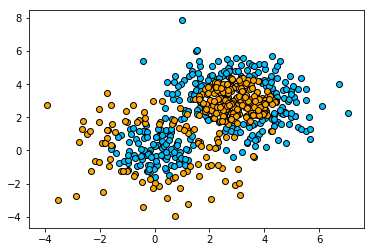

In [314]:
# For those of you who were here yesterday, do you remember this?
import sklearn.datasets, matplotlib.pyplot
X1, y1 = sklearn.datasets.make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)
X2, y2 = sklearn.datasets.make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=400, n_features=2, n_classes=2, random_state=1)
X = numpy.concatenate((X1, X2))
y = numpy.concatenate((y1, -y2 + 1))
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black");

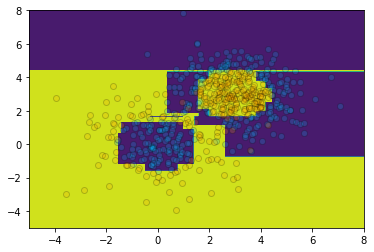

In [316]:
# We made a decision tree using Scikit-Learn...
import sklearn.tree
decision_tree = sklearn.tree.DecisionTreeClassifier(max_depth=8)
decision_tree.fit(X, y)
xx, yy = numpy.meshgrid(numpy.arange(-5, 8, 0.02), numpy.arange(-5, 8, 0.02))
Z = decision_tree.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
matplotlib.pyplot.contourf(xx, yy, Z);
matplotlib.pyplot.scatter(X[y == 0, 0], X[y == 0, 1], c="deepskyblue", edgecolor="black", alpha=0.2);
matplotlib.pyplot.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", edgecolor="black", alpha=0.2);
matplotlib.pyplot.xlim(-5, 8); matplotlib.pyplot.ylim(-5, 8);

In [320]:
# It happens to have exactly the right form to be a columnar tree.
# 
# The code below merely recasts the tree into awkward arrays; very little processing is done.

mask = decision_tree.tree_.children_left < 0
left = decision_tree.tree_.children_left.copy()
right = decision_tree.tree_.children_right.copy()
left[mask] = 0
right[mask] = 0

tree = awkward.Table()
tree["feature"]   = awkward.MaskedArray(mask, decision_tree.tree_.feature)
tree["threshold"] = awkward.MaskedArray(mask, decision_tree.tree_.threshold)
tree["left"]      = awkward.MaskedArray(mask, awkward.IndexedArray(left, tree))
tree["right"]     = awkward.MaskedArray(mask, awkward.IndexedArray(right, tree))
tree["value"]     = decision_tree.tree_.value[:, 0, 0] - decision_tree.tree_.value[:, 0, 1]

In [321]:
# It's a tree! (A fairly large one.)

tree[0].tolist()

{'feature': 1,
 'threshold': 4.358384370803833,
 'left': {'feature': 1,
  'threshold': 1.6863000392913818,
  'left': {'feature': 1,
   'threshold': -1.205420196056366,
   'left': {'feature': 1,
    'threshold': -1.6025586128234863,
    'left': {'feature': None,
     'threshold': None,
     'left': None,
     'right': None,
     'value': -21.0},
    'right': {'feature': 0,
     'threshold': -0.5012892186641693,
     'left': {'feature': None,
      'threshold': None,
      'left': None,
      'right': None,
      'value': -6.0},
     'right': {'feature': 0,
      'threshold': 0.7826883494853973,
      'left': {'feature': None,
       'threshold': None,
       'left': None,
       'right': None,
       'value': 5.0},
      'right': {'feature': None,
       'threshold': None,
       'left': None,
       'right': None,
       'value': -3.0},
      'value': 2.0},
     'value': -4.0},
    'value': -25.0},
   'right': {'feature': 0,
    'threshold': -1.5795212388038635,
    'left': {'feature':

In [329]:
def predict(tree, x):
    if tree["left"] is None:
        return tree["value"]
    elif x[tree["feature"]] < tree["threshold"]:
        return predict(tree["left"], x)
    else:
        return predict(tree["right"], x)

print(f"center of blue dot: {predict(tree[0].tolist(), [0, 0]):4g}")
print(f"center of red  dot: {predict(tree[0].tolist(), [3, 3]):4g}")

center of blue dot:   91
center of red  dot: -154


In [362]:
import sys
def memory_used(x, seen=None):     # quick function to add up memory use without double-counting
    if seen is None: seen = set()
    if id(x) in seen: return 0
    seen.add(id(x))
    if isinstance(x, list):
        return sys.getsizeof(x) + sum(memory_used(y, seen) for y in x)
    elif isinstance(x, dict):
        return sys.getsizeof(x) + sum(memory_used(n, seen) + memory_used(y, seen) for n, y in x.items())
    elif isinstance(x, awkward.MaskedArray):
        return sys.getsizeof(x.mask) + memory_used(x.content, seen) + memory_used(x.maskedwhen, seen)
    elif isinstance(x, awkward.IndexedArray):
        return sys.getsizeof(x.index) + memory_used(x.content, seen)
    elif isinstance(x, awkward.Table):
        return sum(memory_used(n, seen) + memory_used(y, seen) for n, y in x.contents.items())
    else:
        return sys.getsizeof(x)

# The columnar representation uses more than 10× less memory (which is why Scikit-Learn uses it).
memory_used(tree[0].tolist()), memory_used(tree)

(21055, 3291)

<br><br><br><br><br>

## Part 7: nullable and heterogeneous data

<br><br><br><br><br>

<br><br><br>

You might have noticed that awkward arrays are strongly typed objects in the midst of Python.

   * Numpy arrays have a type that is known before performing any calculation (_not dynamic!_).
   * Awkward arrays add jaggedness, tabular structure, cross-references, etc., all in a way that is known before any calculations (_not dynamic!_).

<br>

For an array to contain `None` ("nullable") or multiple types ("heterogeneous"), it has to be statically declared as such.

<br><br><br>

In [369]:
# We've already seen nullable data:

masked_array = awkward.fromiter([1.1, 2.2, None, 3.3, 4.4, 5.5, None, None, None, 6.6])
print(f"masked_array         = {repr(masked_array)}")
print(f"masked_array.mask    = {masked_array.mask}")
print(f"masked_array.content = {masked_array.content.tolist()}")

masked_array         = <MaskedArray [1.1 2.2 None ... None None 6.6] at 0x7fa2caf10358>
masked_array.mask    = [ True  True False  True  True  True False False False  True]
masked_array.content = [1.1, 2.2, 1.5e-323, 3.3, 4.4, 5.5, 8e-323, 8.4e-323, 9e-323, 6.6]


In [375]:
# As with jagged tables and tables of jagged arrays, the meaning of a mask depends on where it is.

a = awkward.MaskedArray([False, True, False, True, False],
        awkward.JaggedArray.fromcounts([3, 0, 0, 1, 1], [1.1, 2.2, 3.3, 4.4, 5.5]))

b = awkward.JaggedArray.fromcounts([3, 0, 0, 1, 1],
        awkward.MaskedArray([False, True, False, True, False], [1.1, 2.2, 3.3, 4.4, 5.5]))

print(f"\nmasked jagged array: {a}  (some subarrays are missing)")
print(f"\njagged masked array: {b} (some numbers are missing)")


masked jagged array: [[1.1 2.2 3.3] None [] None [5.5]]  (some subarrays are missing)

jagged masked array: [[1.1 None 3.3] [] [] [None] [5.5]] (some numbers are missing)


In [414]:
# Heterogeneous data would be less common, unless we want to emulate object-oriented polymorphism.
photons, electrons, muons = uproot.open("data/HZZ-objects.root")["events"].arrays(
                                ["photonp4", "electronp4", "muonp4"], outputtype=tuple)

photons.content   = photons.content.content;   photons.content.rowname   = "Photon"   # rownames
electrons.content = electrons.content.content; electrons.content.rowname = "Electron"
muons.content     = muons.content.content;     muons.content.rowname     = "Muon"
photontags   = photons.x.ones_like()   * 0                                            # jagged, all 0s
electrontags = electrons.x.ones_like() * 1                                            # jagged, all 1s
muontags     = muons.x.ones_like()     * 2                                            # jagged, all 2s
tags = awkward.JaggedArray.concatenate([photontags, electrontags, muontags], axis=1)  # merged!

                                    # JaggedArray of UnionArray for the three collections
particles = awkward.JaggedArray(tags.starts, tags.stops,
                awkward.UnionArray.fromtags(tags.content.astype(awkward.UnionArray.TAGTYPE),
                    [photons.content, electrons.content, muons.content]))

particles[electrons.counts > 0]     # look at interesting events (ones with some electrons)

<JaggedArray [[<Photon 0> <Electron 0> <Electron 1> <Muon 7> <Muon 8>] [<Photon 2> <Electron 2> <Muon 26> <Muon 27>] [<Photon 4> <Electron 3> <Muon 181> <Muon 182>] ... [<Photon 210> <Photon 211> <Electron 166> <Electron 167> <Muon 3734> <Muon 3735>] [<Photon 213> <Photon 214> <Photon 215> <Electron 168> <Muon 3781> <Muon 3782>] [<Photon 216> <Photon 217> <Electron 169> <Electron 170> <Muon 3811> <Muon 3812>]] at 0x7fa2cad8f9b0>

In [417]:
print(f"particles.content.tags        = {particles.content.tags}")
print(f"particles.content.index       = {particles.content.index}")
print(f"particles.content.contents[0] = {particles.content.contents[0]}")
print(f"particles.content.contents[1] = {particles.content.contents[1]}")
print(f"particles.content.contents[2] = {particles.content.contents[2]}")

particles.content.tags        = [2 2 2 ... 2 0 2]
particles.content.index       = [   0    1    2 ... 3823  219 3824]
particles.content.contents[0] = [<Photon 0> <Photon 1> <Photon 2> ... <Photon 217> <Photon 218> <Photon 219>]
particles.content.contents[1] = [<Electron 0> <Electron 1> <Electron 2> ... <Electron 168> <Electron 169> <Electron 170>]
particles.content.contents[2] = [<Muon 0> <Muon 1> <Muon 2> ... <Muon 3822> <Muon 3823> <Muon 3824>]


In [420]:
# All data types can be expressed with
# 
#     * Numpy arrays  for raw numbers
#     * JaggedArrays  to make variable-length lists
#     * Tables        to make objects
#     * IndexedArrays as pointers (within specific collections)
#     * MaskedArrays  for nullability (None)
#     * UnionArrays   for heterogeneous lists
#     * ObjectArrays  for arbitrary Python types (as a back door!)

array = awkward.fromiter([[1.1, 2.2, None, 3.3, None],
                          [4.4, [5.5]],
                          [{"x": 6, "y": {"z": 7}}, None, {"x": 8, "y": {"z": 9}}]
                         ])

array.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

<br><br><br><br><br>

## Part 8: serialization, saving and loading

<br><br><br><br><br>

In [422]:
# Awkward array has a unified serialization model, demonstrated with Pickle, below:

import pickle
serialized = pickle.dumps(array)
serialized

b'\x80\x03cawkward.array.jagged\nJaggedArray\nq\x00)\x81q\x01}q\x02(X\x01\x00\x00\x001q\x03C\x18\x05\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00q\x04X\x01\x00\x00\x003q\x05CP\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x02\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x06\x00\x00\x00\x00\x00\x00\x00q\x06X\x01\x00\x00\x005q\x07C\x07\x00\x00\x00\x00\x01\x02\x02q\x08X\x01\x00\x00\x006q\tC \x9a\x99\x99\x99\x99\x99\xf1?\x9a\x99\x99\x99\x99\x99\x01@ffffff\n@\x9a\x99\x99\x99\x99\x99\x11@q\nX\x01\x00\x00\x008q\x0bC\x08\x01\x00\x00\x00\x00\x00\x00\x00q\x0cX\x01\x00\x00\x009q\rC\x08\x00\x00\x00\x00\x00\x00\x16@q\x0eX\x02\x00\x00\x0011q\x0fC\x10\x06\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00q\x10X\x02\x00\x00\x0013q\x11C\x10\x07\x00\x00\x00\x

In [424]:
# The structure can be fully recovered.

pickle.loads(serialized).tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [445]:
# It fills a dict-like object with named arrays, including one LISP-like reconstruction function.
import json

output = {}
awkward.persist.serialize(array, output, name="a")
print(f"len(output) = {len(output)}")
json.loads(output["a"])

len(output) = 9


{'awkward': '0.10.3',
 'schema': {'id': 0,
  'call': ['awkward', 'JaggedArray', 'fromcounts'],
  'args': [{'id': 1,
    'call': ['awkward', 'numpy', 'frombuffer'],
    'args': [{'read': '1'}, {'dtype': 'int64'}, {'json': 3}]},
   {'id': 2,
    'call': ['awkward', 'IndexedMaskedArray'],
    'args': [{'id': 3,
      'call': ['awkward', 'numpy', 'frombuffer'],
      'args': [{'read': '3'}, {'dtype': 'int64'}, {'json': 10}]},
     {'id': 4,
      'call': ['awkward', 'UnionArray', 'fromtags'],
      'args': [{'id': 5,
        'call': ['awkward', 'numpy', 'frombuffer'],
        'args': [{'read': '5'}, {'dtype': 'uint8'}, {'json': 7}]},
       {'list': [{'id': 6,
          'call': ['awkward', 'numpy', 'frombuffer'],
          'args': [{'read': '6'}, {'dtype': 'float64'}, {'json': 4}]},
         {'id': 7,
          'call': ['awkward', 'JaggedArray', 'fromcounts'],
          'args': [{'id': 8,
            'call': ['awkward', 'numpy', 'frombuffer'],
            'args': [{'read': '8'}, {'dtype': 

In [447]:
# Using this one mechanism, complete structures can be encoded in any format with "named arrays."

# This "awkd" format is just a ZIP file.
awkward.save("tmp.awkd", array, mode="w")
awkward.load("tmp.awkd").tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [449]:
import h5py

# Wrap HDF5 file so that it knows how to read and write awkward-arrays.

with h5py.File("tmp.hdf5", "w") as hdf5_file:
    awkward_hdf5_file = awkward.hdf5(hdf5_file)
    awkward_hdf5_file["array"] = array

with h5py.File("tmp.hdf5") as hdf5_file:
    awkward_hdf5_file = awkward.hdf5(hdf5_file)
    result = awkward_hdf5_file["array"]

# Unlike HDF5's built-in "list of compounds," these objects are columnar (like split ROOT branches).

result.tolist()

[[1.1, 2.2, None, 3.3, None],
 [4.4, [5.5]],
 [{'x': 6, 'y': {'z': 7}}, None, {'x': 8, 'y': {'z': 9}}]]

In [456]:
# Unlike ZIP and HDF5, the Parquet file format natively understands jagged arrays.
# 
# It doesn't recognize all of Awkward's types, so this is a lossy (but widely used) format.

fromroot = awkward.Table(**uproot.open("data/HZZ.root")["events"].arrays(namedecode="utf-8"))
awkward.toparquet("tmp.parquet", fromroot)

fromparquet = awkward.fromparquet("tmp.parquet")

print(f"\nfromroot['Muon_Px']    = {fromroot['Muon_Px']}")
print(f"\nfromparquet['Muon_Px'] = {fromparquet['Muon_Px']}")


fromroot['Muon_Px']    = [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]]

fromparquet['Muon_Px'] = [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]]


In [458]:
# Arrow is a related format, intended for fast interprocess communication.
# 
# Arrow also natively understands jagged arrays, but not all of the Awkward types.

arrow_buffer = awkward.toarrow(fromroot)

fromarrow = awkward.fromarrow(arrow_buffer)

print(f"\nfromroot['Muon_Px']  = {fromroot['Muon_Px']}")
print(f"\nfromarrow['Muon_Px'] = {fromarrow['Muon_Px']}")


fromroot['Muon_Px']  = [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]]

fromarrow['Muon_Px'] = [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]]


<br><br><br><br><br>

## Part 9: chunked and virtual arrays

<br><br><br><br><br>

In [470]:
# Data read from a Parquet file is put into a ChunkedArray of VirtualArrays:

fromparquet = awkward.fromparquet("tmp.parquet")

print(f"\nfromparquet =\n    {repr(fromparquet)}")
print(f"\nfromparquet['Muon_Px'] =\n    {repr(fromparquet['Muon_Px'])}")
print(f"\nfromparquet['Muon_Px'].chunks[0] =\n    {repr(fromparquet['Muon_Px'].chunks[0])}")


fromparquet =
    <ChunkedArray [<Row 0> <Row 1> <Row 2> ... <Row 2418> <Row 2419> <Row 2420>] at 0x7fa2ca9dfa90>

fromparquet['Muon_Px'] =
    <ChunkedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7fa2cae97f98>

fromparquet['Muon_Px'].chunks[0] =
    <VirtualArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7fa2caa11ac8>


In [471]:
# Data from ROOT files have the same structure if read using the new lazyarrays interface.

lazyfromroot = uproot.open("data/HZZ.root")["events"].lazyarrays()

print(f"\nlazyfromroot =\n    {repr(lazyfromroot)}")
print(f"\nlazyfromroot['Muon_Px'] =\n    {repr(lazyfromroot['Muon_Px'])}")
print(f"\nlazyfromroot['Muon_Px'].chunks[0] =\n    {repr(lazyfromroot['Muon_Px'].chunks[0])}")


lazyfromroot =
    <ChunkedArray [<Row 0> <Row 1> <Row 2> ... <Row 2418> <Row 2419> <Row 2420>] at 0x7fa2caef9cc0>

lazyfromroot['Muon_Px'] =
    <ChunkedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7fa2ca9f3898>

lazyfromroot['Muon_Px'].chunks[0] =
    <VirtualArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7fa2caeeefd0>


In [475]:
# ChunkedArrays allow data to be non-contiguous in memory.
# VirtualArrays allow data to be unread until first accessed.
# 
# Together, these form a "lazy array" interface: you get a handle to the whole dataset,
# but nothing is read/decompressed/interpreted until necessary.

array = uproot.open("data/Zmumu.root")["events"]["pt1"].lazyarray(entrysteps=500)

print([x.ismaterialized for x in array.chunks], "\n", sep="")

print(array)
# for chunk in array.chunks:
#     print(chunk)

print("\n", [x.ismaterialized for x in array.chunks], sep="")

[False, False, False, False, False]

[44.7322 38.8311 38.8311 ... 32.3997 32.3997 32.3997]

[True, False, False, False, True]


In [476]:
arrays = uproot.lazyarrays("data/Zmumu*.root", "events", ["E*", "pz*"])

# Just as with JaggedArrays, you can perform calculations through ChunkedArrays.

eta1 = numpy.log((arrays["E1"] + arrays["pz1"]) / (arrays["E1"] - arrays["pz1"]))/2
eta1

<ChunkedArray [-1.2176876596373256 -1.0513871038857279 -1.0513871038857279 -1.0513769369783923 -0.9906823248040668 1.4443295806046543 1.4443295806046543 ...] at 0x7fa2ca7dadd8>

In [486]:
# By default, VirtualArrays cache accessed data indefinitely, so control that with explicit cache.

cache = {}

lazy = uproot.open("data/HZZ.root")["events"].lazyarrays(cache=cache)
print(lazy[["Muon_Px", "Muon_Py", "Muon_Pz"]][0].tolist())

cache.keys()

{'Muon_Px': [-52.89945602416992, 37.7377815246582], 'Muon_Py': [-11.654671669006348, 0.6934735774993896], 'Muon_Pz': [-8.16079330444336, -11.307581901550293]}


dict_keys([<VirtualArray.TransientKey 140336042459032>, <VirtualArray.TransientKey 140336042467512>, <VirtualArray.TransientKey 140336042467736>])

In [487]:
# By default, VirtualArrays cache accessed data indefinitely, so control that with explicit cache.

cache = {}

lazy = awkward.fromparquet("tmp.parquet", cache=cache)
print(lazy[["Muon_Px", "Muon_Py", "Muon_Pz"]][0].tolist())

cache.keys()

{'Muon_Px': [-52.89945602416992, 37.7377815246582], 'Muon_Py': [-11.654671669006348, 0.6934735774993896], 'Muon_Pz': [-8.16079330444336, -11.307581901550293]}


dict_keys([<VirtualArray.TransientKey 140337167395640>, <VirtualArray.TransientKey 140337167395528>, <VirtualArray.TransientKey 140337167395864>])

In [488]:
import os

# Load lazy arrays with persistvirtual=True (persistence methods remember that the chunks of the lazy array are virtual)
arrays = uproot.open("data/HZZ.root")["events"].lazyarrays(persistvirtual=True)

# Add new data to the Table, not previously in the ROOT file
arrays["Muon_Pt"] = numpy.sqrt(arrays["Muon_Px"]**2 + arrays["Muon_Py"]**2)

# Save as an awkward-array file
awkward.save("tmp.awkd", arrays, mode="w")

# The file contains Muon_Pt and only INSTRUCTIONS for reading data from ROOT
os.path.getsize("tmp.awkd") // 1024, os.path.getsize("data/HZZ.root") // 1024

(45, 212)

In [489]:
# So when we read it back, we can pretend it's one dataset, but original columns come from ROOT
# and derived columns come from the awkd file.

arrays = awkward.load("tmp.awkd")

print(f"\n\nread from data/HZZ.root:\narrays['Muon_Pz'] = {arrays['Muon_Pz']}")
print(f"\n\nread from tmp.awkd:\narrays['Muon_Pt'] = {arrays['Muon_Pt']}")

# Note: won't work if the original ROOT files ever get moved...



read from data/HZZ.root:
arrays['Muon_Pz'] = [[-8.160793 -11.307582] [20.199968] [11.168285 36.96519] ... [-52.66375] [162.17632] [54.719437]]


read from tmp.awkd:
arrays['Muon_Pt'] = [[54.168106 37.744152] [24.417913] [53.58827 29.811996] ... [33.461536] [63.619816] [42.93995]]


In [490]:
# Apply a cut to get a new collection (lazy mask; not a big copy)
selected = arrays[arrays['Muon_Pt'].max() > 60]
print(selected)

# Save the lazily masked data
awkward.save("tmp2.awkd", selected, mode="w")

# Still not a very big file (essentially an event list)
os.path.getsize("tmp2.awkd") // 1024, os.path.getsize("data/HZZ.root") // 1024

# (Nearly) zero-cost skims!

[<Row 3> <Row 4> <Row 8> <Row 9> <Row 11> <Row 12> <Row 14> ...]


(53, 212)

In [491]:
# The filtered file contains filtered data
arrays2 = awkward.load("tmp2.awkd")

print(f"\n\nfile has selected contents:\narrays2 = {arrays2}")
print(f"\n\nread from data/HZZ.root:\narrays2['Muon_Pz'] = {arrays2['Muon_Pz']}")
print(f"\n\nread from tmp.awkd:\narrays2['Muon_Pt'] = {arrays2['Muon_Pt']}")



file has selected contents:
arrays2 = [<Row 3> <Row 4> <Row 8> ... <Row 2406> <Row 2411> <Row 2419>]


read from data/HZZ.root:
arrays2['Muon_Pz'] = [[403.84845 335.0942] [-89.69573 20.115053] [35.638836 -17.473787] ... [-113.74551 -113.811455] [-24.587757 -0.38994783] [162.17632]]


read from tmp.awkd:
arrays2['Muon_Pt'] = [[88.63194 77.951485] [81.011406 47.175045] [106.28356 12.311636] ... [76.18734 31.307274] [61.645054 28.647495] [63.619816]]


In [493]:
# All the same is true, coming from a Parquet file.

arrays = awkward.fromparquet("tmp.parquet", persistvirtual=True)

arrays["Muon_Pt"] = numpy.sqrt(arrays["Muon_Px"]**2 + arrays["Muon_Py"]**2)

awkward.save("tmp.awkd", arrays, mode="w")

os.path.getsize("tmp.awkd") // 1024, os.path.getsize("tmp.parquet") // 1024

(44, 235)

<br><br><br><br><br><br>

<center><b>That's all!</b></center>

<br><br><br><br><br><br>